In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_all_rasff_not = pd.read_csv('RASFF_data.csv')

In [11]:
df_all_rasff_not.head()

Category                Product  \
0            Herbs and spices                   food   
1  Other food product / mixed                   food   
2  Other food product / mixed                   food   
3      Food contact materials  food contact material   
4     Dietetic foods, food...                   food   

                                             Subject         Date  \
0                  Mouse droppings in red clover tea  16 JUN 2023   
1              Undeclared sulphite in yellow raisins  16 JUN 2023   
2  Allergens not mentioned on the label of noodle...  16 JUN 2023   
3  Unauthorised use of plastic materials and bamb...  16 JUN 2023   
4  Improper Official Certificate(s) for food supp...  16 JUN 2023   

                                    Class     Decision  
0  information notification for follow-up  not serious  
1                      alert notification      serious  
2  information notification for attention      serious  
3  information notification for follow-up  not serious  
4           border rejection notification  not serious

In [2]:
df = pd.read_csv('bivalve_clean.csv')

In [3]:
df

Category Product  \
0     Bivalve molluscs and products...    food   
1     Bivalve molluscs and products...    food   
2     Bivalve molluscs and products...    food   
3     Bivalve molluscs and products...    food   
4     Bivalve molluscs and products...    food   
...                                ...     ...   
5712  Bivalve molluscs and products...    food   
5713  Bivalve molluscs and products...    food   
5714  Bivalve molluscs and products...    food   
5715  Bivalve molluscs and products...    food   
5716  Bivalve molluscs and products...    food   

                                                Subject Notification Reason  \
0     Norovirus genogroup I and II in japanese clam ...           Norovirus   
1     Escherichia coli in clams (chamelea gallina) f...              E.coli   
2     Norovirus types I and II in clams (Chamelea ga...           Norovirus   
3     Norovirus genogroup I and II in japanese clam ...           Norovirus   
4     Escherichia coli in clams (chamelea gallina) f...              E.coli   
...                                                 ...                 ...   
5712                               Norovirus in oysters           Norovirus   
5713                               Norovirus in oysters           Norovirus   
5714                               Norovirus in oysters           Norovirus   
5715                               Norovirus in oysters           Norovirus   
5716                               Norovirus in oysters           Norovirus   

     Bivalve Specie        Date  Day Month  Year  \
0             Clams  2 JUN 2023    2   JUN  2023   
1             Clams  2 JUN 2023    2   JUN  2023   
2             Clams  1 JUN 2023    1   JUN  2023   
3             Clams  2 JUN 2023    2   JUN  2023   
4             Clams  2 JUN 2023    2   JUN  2023   
...             ...         ...  ...   ...   ...   
5712        Oysters  9 MAR 2022    9   MAR  2022   
5713        Oysters  9 MAR 2022    9   MAR  2022   
5714        Oysters  9 MAR 2022    9   MAR  2022   
5715        Oysters  9 MAR 2022    9   MAR  2022   
5716        Oysters  9 MAR 2022    9   MAR  2022   

                                       Class             Decision  
0     information notification for attention  potentially serious  
1     information notification for attention              serious  
2     information notification for attention  potentially serious  
3     information notification for attention  potentially serious  
4     information notification for attention              serious  
...                                      ...                  ...  
5712  information notification for attention              serious  
5713  information notification for attention              serious  
5714  information notification for attention              serious  
5715  information notification for attention              serious  
5716  information notification for attention              serious  

[5717 rows x 11 columns]

# Bivalve molluscs

__Bivalves Number of RASFF Notifications__

In [13]:
print('There are {} RASFF notifications in between {} and {}'.format(df_all_rasff_not.shape[0],df_all_rasff_not['Date'].iloc[0],df['Date'].iloc[-1]))
print('There are {} RASFF notifications related to bivalve molluscs and products'.format(df.shape[0]))
print('{} % of all RASFF notifications refers to bivalve mollucscs and products'.format(round(((df.shape[0] / df_all_rasff_not.shape[0])*100),2)))

There are 201800 RASFF notifications in between 16 JUN 2023 and 9 MAR 2022
There are 5717 RASFF notifications related to bivalve molluscs and products
2.83 % of all RASFF notifications refers to bivalve mollucscs and products


__Bivalves and RASFF Notification Reason__

In [14]:
df['Notification Reason'].value_counts()

Salmonella                 2901
Norovirus                  2223
E.coli                      345
Food poisoning               75
Other Reason                 72
Cadmium                      71
Lipophilic biotoxins          9
Vibrio parahaemolyticus       8
Salmonella and E.coli         3
Azaspiracid toxins            3
ASP toxins                    2
Rotavirus                     2
Pinnatoxins                   2
Okadaic acid                  1
Name: Notification Reason, dtype: int64

In [17]:
bivalve_not_count = df.groupby('Notification Reason').agg(Count=('Notification Reason','count'))
bivalve_not_count.reset_index(inplace=True)
bivalve_not_count.sort_values(by='Count',ascending=False,inplace=True)
bivalve_not_count

Notification Reason  Count
11               Salmonella   2901
6                 Norovirus   2223
3                    E.coli    345
4            Food poisoning     75
8              Other Reason     72
2                   Cadmium     71
5      Lipophilic biotoxins      9
13  Vibrio parahaemolyticus      8
1        Azaspiracid toxins      3
12    Salmonella and E.coli      3
0                ASP toxins      2
9               Pinnatoxins      2
10                Rotavirus      2
7              Okadaic acid      1

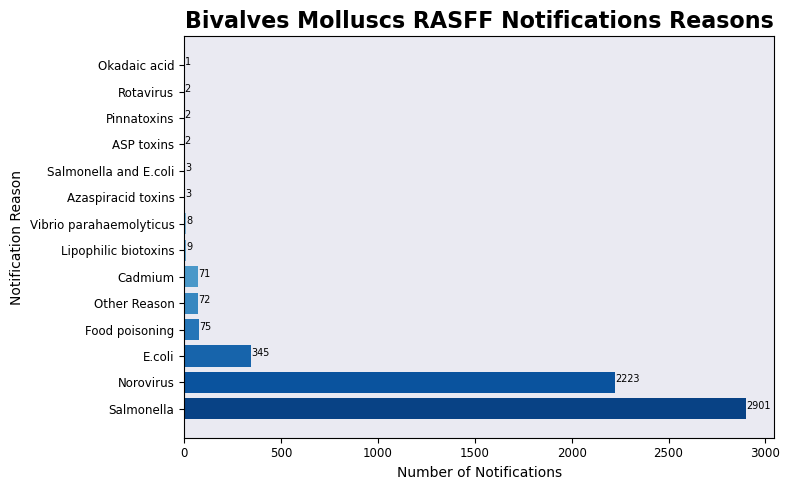

In [23]:
plt.figure(figsize=(8,5))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plt.barh(bivalve_not_count['Notification Reason'],bivalve_not_count['Count'], color = sns.color_palette('Blues_r',len(bivalve_not_count)))

plt.title('Bivalves Molluscs RASFF Notifications Reasons', fontweight='bold', fontsize=16)

plt.xlabel('Number of Notifications', fontsize=10)
plt.xticks(fontsize=8.5)

plt.ylabel('Notification Reason',fontsize=10)
plt.yticks(fontsize=8.5)

for i, v in enumerate(bivalve_not_count['Count']):
    plt.text(v+1, i, str(v), color='black', fontsize=7)
    
plt.tight_layout()

plt.show()

__Bivalves and Specie Affected__

In [24]:
df['Bivalve Specie'].value_counts()

Mussels         3152
Oysters         2051
Clams            464
Scallops          34
Other Specie      11
Tellins            5
Name: Bivalve Specie, dtype: int64

In [29]:
bivalve_specie = df.groupby('Bivalve Specie').agg(Count=('Bivalve Specie','count'))
bivalve_specie.reset_index(inplace=True)
bivalve_specie.sort_values(by='Count',ascending=False, inplace=True)
bivalve_specie

Bivalve Specie  Count
1        Mussels   3152
3        Oysters   2051
0          Clams    464
4       Scallops     34
2   Other Specie     11
5        Tellins      5

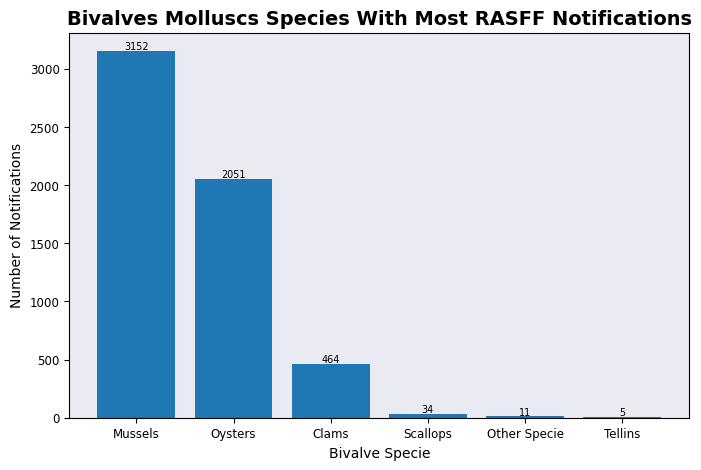

In [36]:
plt.figure(figsize=(8,5))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plot = plt.bar(bivalve_specie['Bivalve Specie'],bivalve_specie['Count'])

plt.title('Bivalves Molluscs Species With Most RASFF Notifications', fontweight='bold', fontsize=14)

plt.xlabel('Bivalve Specie', fontsize=10)
plt.xticks(fontsize=8.5)

plt.ylabel('Number of Notifications',fontsize=10)
plt.yticks(fontsize=8.5)

for i in plot.patches:
    plt.annotate(
        i.get_height(),
        (i.get_x() + i.get_width() / 2, i.get_height()),
        ha="center",
        va="baseline",
        fontsize=7,
        color="black",
        xytext=(0, 1),
        textcoords="offset points"
    )

plt.show()

__Bivalve and RASFF Notification Class__

In [38]:
df['Class'].value_counts()

information notification for attention    5269
alert notification                         328
information notification for follow-up     110
border rejection notification               10
Name: Class, dtype: int64

In [39]:
df_class = df.groupby('Class').agg(Count=('Class','count'))
df_class.reset_index(inplace=True)
df_class.sort_values(by='Count',ascending=False,inplace=True)
df_class

Class  Count
2  information notification for attention   5269
0                      alert notification    328
3  information notification for follow-up    110
1           border rejection notification     10

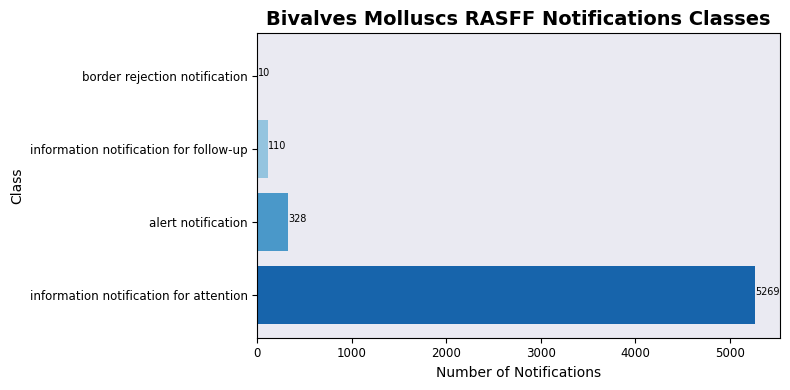

In [43]:
plt.figure(figsize=(8,4))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plt.barh(df_class['Class'],df_class['Count'], color = sns.color_palette('Blues_r',len(df_class)))

plt.title('Bivalves Molluscs RASFF Notifications Classes', fontweight='bold', fontsize=14)

plt.xlabel('Number of Notifications', fontsize=10)
plt.xticks(fontsize=8.5)

plt.ylabel('Class',fontsize=10)
plt.yticks(fontsize=8.5)

for i, v in enumerate(df_class['Count']):
    plt.text(v+1, i, str(v), color='black', fontsize=7)
    
plt.tight_layout()

plt.show()

__Bivalve and RASFF Notification Decision__

In [44]:
df['Decision'].value_counts()

serious                5196
undecided               298
potentially serious     210
not serious              13
Name: Decision, dtype: int64

In [45]:
df_dec = df.groupby('Decision').agg(Count=('Decision','count'))
df_dec.reset_index(inplace=True)
df_dec.sort_values(by='Count',ascending=False,inplace=True)
df_dec

Decision  Count
2              serious   5196
3            undecided    298
1  potentially serious    210
0          not serious     13

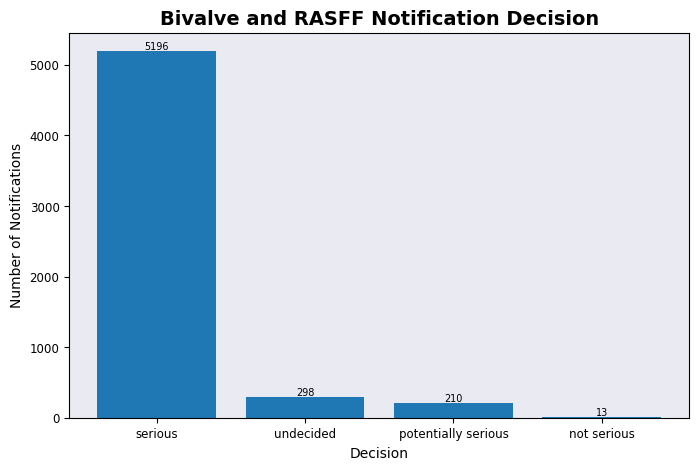

In [47]:
plt.figure(figsize=(8,5))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plot = plt.bar(df_dec['Decision'],df_dec['Count'])

plt.title('Bivalve and RASFF Notification Decision', fontweight='bold', fontsize=14)

plt.xlabel('Decision', fontsize=10)
plt.xticks(fontsize=8.5)

plt.ylabel('Number of Notifications',fontsize=10)
plt.yticks(fontsize=8.5)

for i in plot.patches:
    plt.annotate(
        i.get_height(),
        (i.get_x() + i.get_width() / 2, i.get_height()),
        ha="center",
        va="baseline",
        fontsize=7,
        color="black",
        xytext=(0, 1),
        textcoords="offset points"
    )

plt.show()

Functions

In [67]:
def count(data,subject):
    df_count = data.groupby(subject).agg(Count=(subject,'count'))
    df_count.reset_index(inplace=True)
    df_count.sort_values(by='Count',ascending=False,inplace=True)
    return df_count

In [83]:
# plot for notification reasons
def notification_reason(data,specie):
    
    plt.figure(figsize=(8,5))

    plt.gca().set_facecolor('#EAEAF2')

    plt.barh(data['Notification Reason'],data['Count'], color = sns.color_palette('Blues_r',len(data)))

    plt.title('{} RASFF Notifications Reasons'.format(specie), fontweight='bold', fontsize=16)

    plt.xlabel('Number of Notifications', fontsize=10)
    plt.xticks(fontsize=8.5)

    plt.ylabel('Notification Reason',fontsize=10)
    plt.yticks(fontsize=8.5)

    for i, v in enumerate(data['Count']):
        plt.text(v+1, i, str(v), color='black', fontsize=7)

    plt.tight_layout()

    plt.show()

In [93]:
#plot notification classes
def notification_class(data,specie):
    
    plt.figure(figsize=(8,4))

    plt.gca().set_facecolor('#EAEAF2')

    plt.barh(data['Class'],data['Count'], color = sns.color_palette('Blues_r',len(data)))

    plt.title('{} RASFF Notifications Classes'.format(specie), fontweight='bold', fontsize=14)

    plt.xlabel('Number of Notifications', fontsize=10)
    plt.xticks(fontsize=8.5)

    plt.ylabel('Class',fontsize=10)
    plt.yticks(fontsize=8.5)

    for i, v in enumerate(data['Count']):
        plt.text(v+1, i, str(v), color='black', fontsize=7)

    plt.tight_layout()

    plt.show()

In [97]:
#plot notifications decisions
def notification_decision(data,specie):
    
    plt.figure(figsize=(8,5))

    plt.gca().set_facecolor('#EAEAF2')

    plot = plt.bar(data['Decision'],data['Count'])

    plt.title('{} and RASFF Notification Decision'.format(specie), fontweight='bold', fontsize=14)

    plt.xlabel('Decision', fontsize=10)
    plt.xticks(fontsize=8.5)

    plt.ylabel('Number of Notifications',fontsize=10)
    plt.yticks(fontsize=8.5)

    for i in plot.patches:
        plt.annotate(
            i.get_height(),
            (i.get_x() + i.get_width() / 2, i.get_height()),
            ha="center",
            va="baseline",
            fontsize=7,
            color="black",
            xytext=(0, 1),
            textcoords="offset points"
        )

    plt.show()

# Mussels

In [73]:
mussels = df[df['Bivalve Specie']=='Mussels']
mussels

Category Product  \
106   Bivalve molluscs and products...    food   
107   Bivalve molluscs and products...    food   
108   Bivalve molluscs and products...    food   
109   Bivalve molluscs and products...    food   
110   Bivalve molluscs and products...    food   
...                                ...     ...   
4693  Bivalve molluscs and products...    food   
4694  Bivalve molluscs and products...    food   
4695  Bivalve molluscs and products...    food   
4696  Bivalve molluscs and products...    food   
4697  Bivalve molluscs and products...    food   

                                                Subject Notification Reason  \
106   Salmonella spp in frozen precooked mussels fro...          Salmonella   
107   Salmonella spp in frozen precooked mussels fro...          Salmonella   
108   Salmonella spp in frozen precooked mussels fro...          Salmonella   
109   Salmonella spp in frozen precooked mussels fro...          Salmonella   
110   Salmonella spp in frozen precooked mussels fro...          Salmonella   
...                                                 ...                 ...   
4693  Escherichia coli (350-1600 MPN/100g) in mussel...              E.coli   
4694  Escherichia coli (350-1600 MPN/100g) in mussel...              E.coli   
4695  Escherichia coli (350-1600 MPN/100g) in mussel...              E.coli   
4696  Escherichia coli (350-1600 MPN/100g) in mussel...              E.coli   
4697  Escherichia coli (350-1600 MPN/100g) in mussel...              E.coli   

     Bivalve Specie         Date  Day Month  Year  \
106         Mussels  17 APR 2023   17   APR  2023   
107         Mussels  17 APR 2023   17   APR  2023   
108         Mussels  17 APR 2023   17   APR  2023   
109         Mussels  17 APR 2023   17   APR  2023   
110         Mussels  17 APR 2023   17   APR  2023   
...             ...          ...  ...   ...   ...   
4693        Mussels  21 MAR 2022   21   MAR  2022   
4694        Mussels  21 MAR 2022   21   MAR  2022   
4695        Mussels  21 MAR 2022   21   MAR  2022   
4696        Mussels  21 MAR 2022   21   MAR  2022   
4697        Mussels  21 MAR 2022   21   MAR  2022   

                                       Class Decision  
106   information notification for attention  serious  
107   information notification for attention  serious  
108   information notification for attention  serious  
109   information notification for attention  serious  
110   information notification for attention  serious  
...                                      ...      ...  
4693  information notification for attention  serious  
4694  information notification for attention  serious  
4695  information notification for attention  serious  
4696  information notification for attention  serious  
4697  information notification for attention  serious  

[3152 rows x 11 columns]

__Mussels Number of Notifications__

In [75]:
print('There are {} RASFF notifications in between {} and {}'.format(df_all_rasff_not.shape[0],df_all_rasff_not['Date'].iloc[0],df['Date'].iloc[-1]))
print('There are {} RASFF notifications related to bivalve molluscs and products'.format(df.shape[0]))
print('There are {} RASFF notifications related to clams'.format(mussels.shape[0]))
print('{} % of all RASFF notifications refers to clams'.format(round(((mussels.shape[0] / df_all_rasff_not.shape[0])*100),2)))
print('{} % of Bivalve Molluscs RASFF notifications refers to clams'.format(round(((mussels.shape[0] / df.shape[0])*100),2)))

There are 201800 RASFF notifications in between 16 JUN 2023 and 9 MAR 2022
There are 5717 RASFF notifications related to bivalve molluscs and products
There are 3152 RASFF notifications related to clams
1.56 % of all RASFF notifications refers to clams
55.13 % of Bivalve Molluscs RASFF notifications refers to clams


__Mussels and RASFF Notification Reason__

In [80]:
mussels_not_reasons = count(mussels,'Notification Reason')
mussels_not_reasons

Notification Reason  Count
5               Salmonella   2762
2                   E.coli    203
3                Norovirus    102
1                  Cadmium     71
7  Vibrio parahaemolyticus      8
0       Azaspiracid toxins      2
4              Pinnatoxins      2
6    Salmonella and E.coli      2

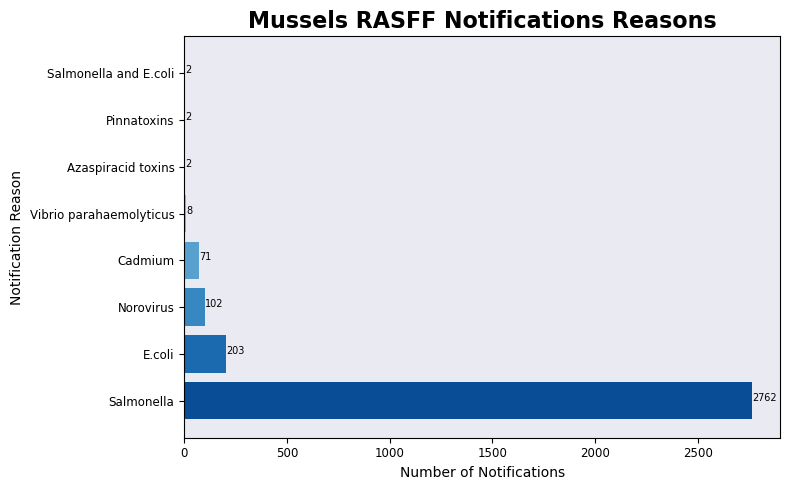

In [84]:
notification_reason(mussels_not_reasons,'Mussels')

__Clams and RASFF Notification Class__

In [82]:
mussels_not_class = count(mussels,'Class')
mussels_not_class

Class  Count
1  information notification for attention   3147
0                      alert notification      5

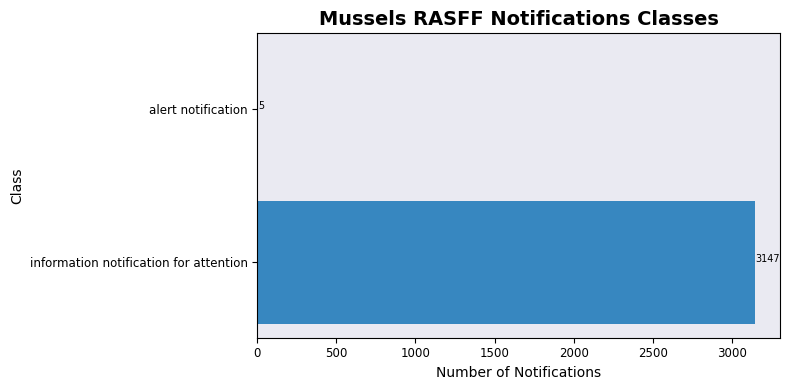

In [94]:
notification_class(mussels_not_class,'Mussels')

__Mussels and RASFF Notification Decision__

In [95]:
mussels_not_decision = count(mussels,'Decision')
mussels_not_decision

Decision  Count
1      serious   3050
2    undecided    101
0  not serious      1

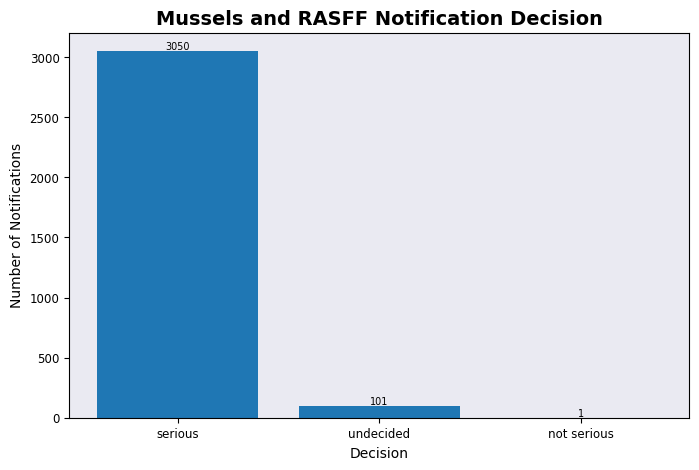

In [99]:
notification_decision(mussels_not_decision,'Mussels')

# Oysters

In [100]:
oysters = df[df['Bivalve Specie']=='Oysters']
oysters

Category Product  \
104   Bivalve molluscs and products...    food   
105   Bivalve molluscs and products...    food   
2761  Bivalve molluscs and products...    food   
2762  Bivalve molluscs and products...    food   
2763  Bivalve molluscs and products...    food   
...                                ...     ...   
5712  Bivalve molluscs and products...    food   
5713  Bivalve molluscs and products...    food   
5714  Bivalve molluscs and products...    food   
5715  Bivalve molluscs and products...    food   
5716  Bivalve molluscs and products...    food   

                                                Subject Notification Reason  \
104   Presence of Norovirus type I in oysters (Crass...           Norovirus   
105   Presence of Norovirus type I in oysters (Crass...           Norovirus   
2761                   Norovirus in oysters from France           Norovirus   
2762                   Norovirus in oysters from France           Norovirus   
2763                   Norovirus in oysters from France           Norovirus   
...                                                 ...                 ...   
5712                               Norovirus in oysters           Norovirus   
5713                               Norovirus in oysters           Norovirus   
5714                               Norovirus in oysters           Norovirus   
5715                               Norovirus in oysters           Norovirus   
5716                               Norovirus in oysters           Norovirus   

     Bivalve Specie         Date  Day Month  Year  \
104         Oysters  10 MAY 2023   10   MAY  2023   
105         Oysters  10 MAY 2023   10   MAY  2023   
2761        Oysters   7 APR 2023    7   APR  2023   
2762        Oysters   7 APR 2023    7   APR  2023   
2763        Oysters   7 APR 2023    7   APR  2023   
...             ...          ...  ...   ...   ...   
5712        Oysters   9 MAR 2022    9   MAR  2022   
5713        Oysters   9 MAR 2022    9   MAR  2022   
5714        Oysters   9 MAR 2022    9   MAR  2022   
5715        Oysters   9 MAR 2022    9   MAR  2022   
5716        Oysters   9 MAR 2022    9   MAR  2022   

                                       Class     Decision  
104   information notification for attention  not serious  
105   information notification for attention  not serious  
2761  information notification for attention      serious  
2762  information notification for attention      serious  
2763  information notification for attention      serious  
...                                      ...          ...  
5712  information notification for attention      serious  
5713  information notification for attention      serious  
5714  information notification for attention      serious  
5715  information notification for attention      serious  
5716  information notification for attention      serious  

[2051 rows x 11 columns]

__Oysters Number of Notifications__

In [102]:
print('There are {} RASFF notifications in between {} and {}'.format(df_all_rasff_not.shape[0],df_all_rasff_not['Date'].iloc[0],df['Date'].iloc[-1]))
print('There are {} RASFF notifications related to bivalve molluscs and products'.format(df.shape[0]))
print('There are {} RASFF notifications related to oysters'.format(oysters.shape[0]))
print('{} % of all RASFF notifications refers to oysters'.format(round(((oysters.shape[0] / df_all_rasff_not.shape[0])*100),2)))
print('{} % of Bivalve Molluscs RASFF notifications refers to oysters'.format(round(((oysters.shape[0] / df.shape[0])*100),2)))

There are 201800 RASFF notifications in between 16 JUN 2023 and 9 MAR 2022
There are 5717 RASFF notifications related to bivalve molluscs and products
There are 2051 RASFF notifications related to oysters
1.02 % of all RASFF notifications refers to oysters
35.88 % of Bivalve Molluscs RASFF notifications refers to oysters


__Oysters and RASFF Notification Reason__

In [103]:
oysters_not_reasons = count(oysters,'Notification Reason')
oysters_not_reasons

Notification Reason  Count
2           Norovirus   1956
1      Food poisoning     75
3        Other Reason     17
4           Rotavirus      2
0  Azaspiracid toxins      1

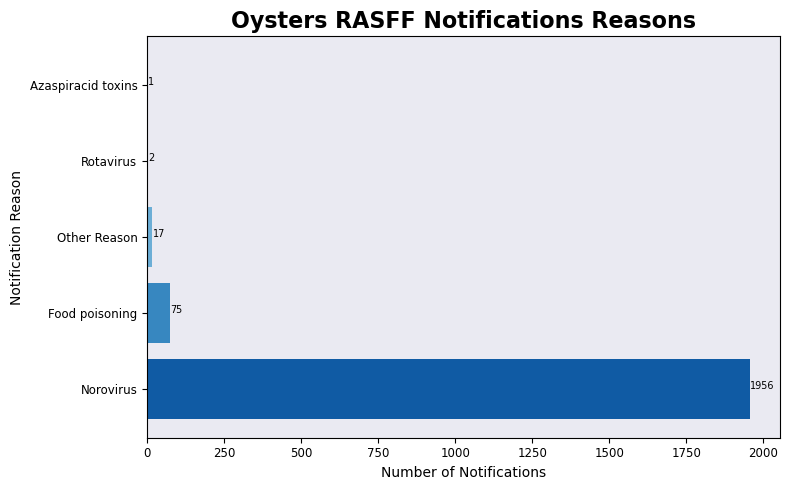

In [104]:
notification_reason(oysters_not_reasons,'Oysters')

__Oysters and RASFF Notification Class__

In [105]:
oysters_not_class = count(oysters,'Class')
oysters_not_class

Class  Count
2  information notification for attention   1891
0                      alert notification     95
3  information notification for follow-up     56
1           border rejection notification      9

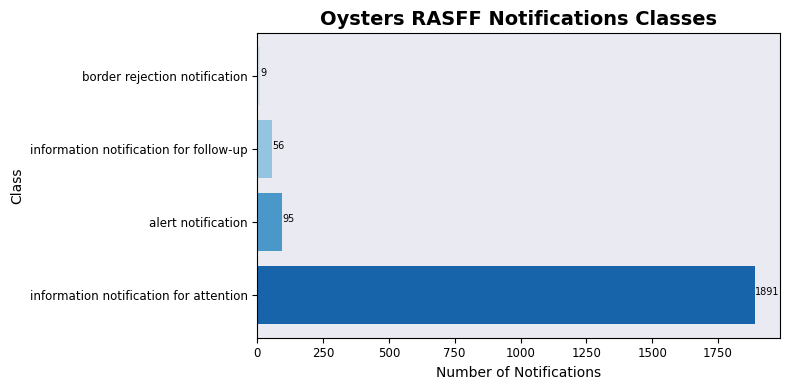

In [107]:
notification_class(oysters_not_class,'Oysters')

__Oysters and RASFF Notification Decision__

In [108]:
oysters_not_dec = count(oysters,'Decision')
oysters_not_dec

Decision  Count
2              serious   1789
3            undecided    127
1  potentially serious    123
0          not serious     12

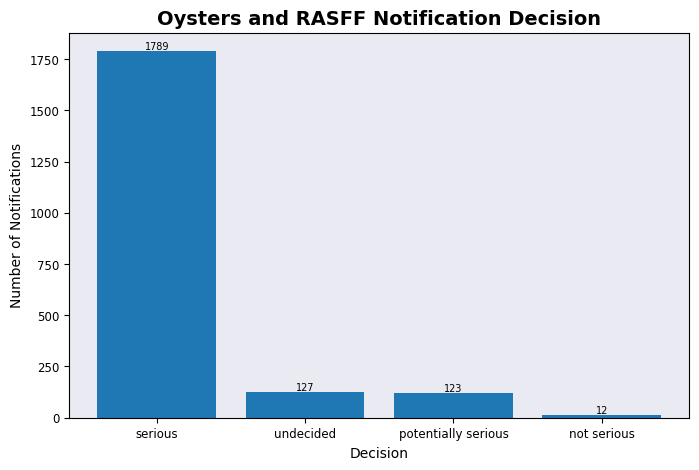

In [109]:
notification_decision(oysters_not_dec,'Oysters')

# Clams

In [49]:
clams = df[df['Bivalve Specie']=='Clams']
clams

Category Product  \
0     Bivalve molluscs and products...    food   
1     Bivalve molluscs and products...    food   
2     Bivalve molluscs and products...    food   
3     Bivalve molluscs and products...    food   
4     Bivalve molluscs and products...    food   
...                                ...     ...   
4515  Bivalve molluscs and products...    food   
4516  Bivalve molluscs and products...    food   
4517  Bivalve molluscs and products...    food   
4518  Bivalve molluscs and products...    food   
4519  Bivalve molluscs and products...    food   

                                                Subject Notification Reason  \
0     Norovirus genogroup I and II in japanese clam ...           Norovirus   
1     Escherichia coli in clams (chamelea gallina) f...              E.coli   
2     Norovirus types I and II in clams (Chamelea ga...           Norovirus   
3     Norovirus genogroup I and II in japanese clam ...           Norovirus   
4     Escherichia coli in clams (chamelea gallina) f...              E.coli   
...                                                 ...                 ...   
4515  Norovirus in vongole veraci (Ruditapes philipp...           Norovirus   
4516  Norovirus in vongole veraci (Ruditapes philipp...           Norovirus   
4517  Norovirus in vongole veraci (Ruditapes philipp...           Norovirus   
4518  Norovirus in vongole veraci (Ruditapes philipp...           Norovirus   
4519  Norovirus in vongole veraci (Ruditapes philipp...           Norovirus   

     Bivalve Specie         Date  Day Month  Year  \
0             Clams   2 JUN 2023    2   JUN  2023   
1             Clams   2 JUN 2023    2   JUN  2023   
2             Clams   1 JUN 2023    1   JUN  2023   
3             Clams   2 JUN 2023    2   JUN  2023   
4             Clams   2 JUN 2023    2   JUN  2023   
...             ...          ...  ...   ...   ...   
4515          Clams  13 APR 2022   13   APR  2022   
4516          Clams  13 APR 2022   13   APR  2022   
4517          Clams  13 APR 2022   13   APR  2022   
4518          Clams  13 APR 2022   13   APR  2022   
4519          Clams  13 APR 2022   13   APR  2022   

                                       Class             Decision  
0     information notification for attention  potentially serious  
1     information notification for attention              serious  
2     information notification for attention  potentially serious  
3     information notification for attention  potentially serious  
4     information notification for attention              serious  
...                                      ...                  ...  
4515  information notification for attention            undecided  
4516  information notification for attention            undecided  
4517  information notification for attention            undecided  
4518  information notification for attention            undecided  
4519  information notification for attention            undecided  

[464 rows x 11 columns]

__Clams Number of Notifications__

In [52]:
print('There are {} RASFF notifications in between {} and {}'.format(df_all_rasff_not.shape[0],df_all_rasff_not['Date'].iloc[0],df['Date'].iloc[-1]))
print('There are {} RASFF notifications related to bivalve molluscs and products'.format(df.shape[0]))
print('There are {} RASFF notifications related to clams'.format(clams.shape[0]))
print('{} % of all RASFF notifications refers to clams'.format(round(((clams.shape[0] / df_all_rasff_not.shape[0])*100),2)))
print('{} % of Bivalve Molluscs RASFF notifications refers to clams'.format(round(((clams.shape[0] / df.shape[0])*100),2)))

There are 201800 RASFF notifications in between 16 JUN 2023 and 9 MAR 2022
There are 5717 RASFF notifications related to bivalve molluscs and products
There are 464 RASFF notifications related to clams
0.23 % of all RASFF notifications refers to clams
8.12 % of Bivalve Molluscs RASFF notifications refers to clams


__Clams and RASFF Notification Reason__

In [58]:
df_clams = count(clams,'Notification Reason')
df_clams

Notification Reason  Count
2              Norovirus    162
0                 E.coli    137
4             Salmonella    105
3           Other Reason     53
1   Lipophilic biotoxins      6
5  Salmonella and E.coli      1

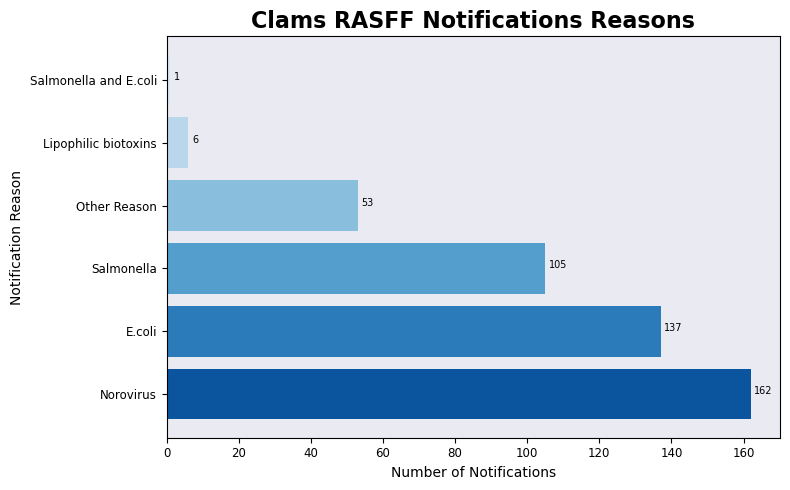

In [110]:
notification_reason(df_clams,'Clams')

__Clams and RASFF Notification Class__

In [61]:
df_clams_class = count(clams,'Class')
df_clams_class

Class  Count
1  information notification for attention    223
0                      alert notification    188
2  information notification for follow-up     53

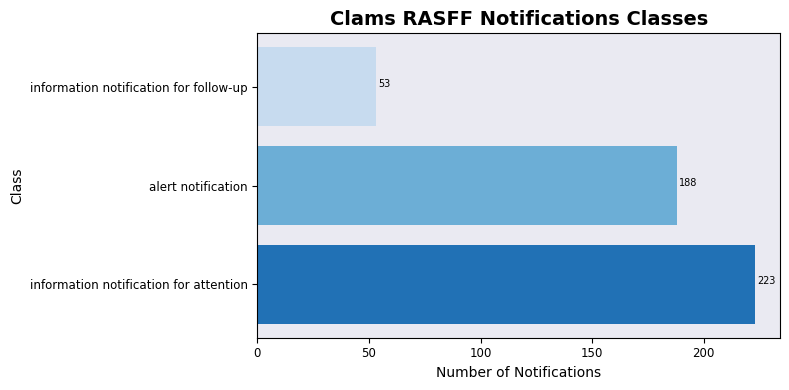

In [111]:
notification_class(df_clams_class,'Clams')

__Clams and RASFF Notification Decision__

In [65]:
df_clams_dec = count(clams,'Decision')
df_clams_dec

Decision  Count
1              serious    309
0  potentially serious     87
2            undecided     68

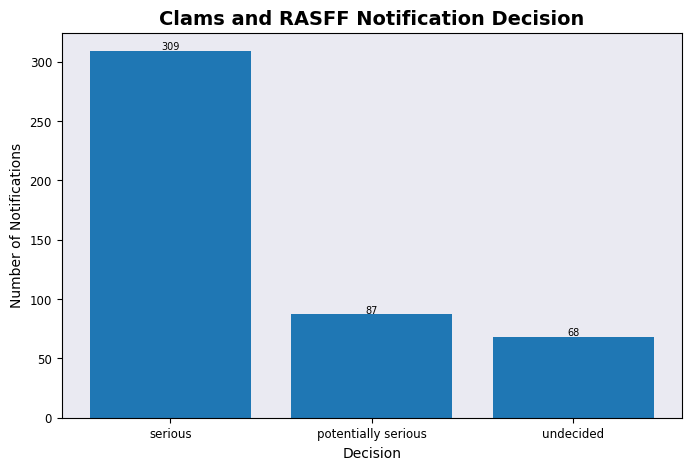

In [112]:
notification_decision(df_clams_dec,'Clams')